### Additional test for section 3


In [1]:
# packages
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

from scipy import signal, fft
from scipy.optimize import brentq


In [2]:
# external function files
import functions, filters_func
import utils
from functions import signals_ex
from functions import amplitude_sampler
import amplitudeSampling

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
T = 1
t_range = np.linspace(0,T,1000)
q= functions.quantizer(5)

In [5]:
def amp_smp(func, T, q, xlim, k, plot):


    t_inst, q_idx = functions.amplitude_sampler(func, T, q)
    pulse_times = functions.decompose(t_inst, q_idx, T)
    x = np.linspace(0, T, 1000)  # time vector

    FS_complete = 0
    for i in range(len(pulse_times)):
        F_tmp = functions.FS(k, pulse_times[i][0], pulse_times[i][1], T, x, q.step * 2)
        FS_complete = FS_complete + F_tmp
    #----------------------------------------------------------------
    off = np.real(FS_complete) - q.quantize(func(x))
    if plot:
        plt.plot(x, FS_complete - off, label="Fouries series")
        plt.plot(x, func(x), label="Original signal")
        functions.plot_decomposition(functions.decompose(t_inst, q_idx, T), q, plot= True)
        plt.title("Fourier series reconstruction")
        plt.xlim(0, xlim)
        plt.legend();
        plt.grid()

    return FS_complete, FS_complete- off

#### Sin function

In [6]:
def sin_ampSmp(x):
    f0 = 1.2# Hz
    return 0.9 * np.sin(2 * np.pi * f0 * x)

C:\Users\Utente\anaconda3\envs\SP_pycharm\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


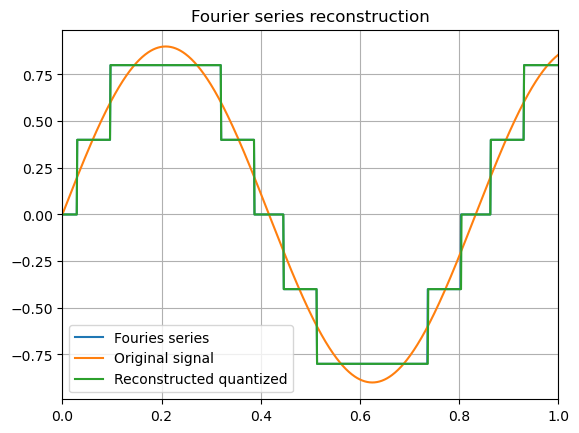

In [7]:
xlimit = 1
k = 200
T = 1
sin_FS, sin_FS_off= amp_smp(sin_ampSmp, T, q, xlimit, k, plot=True)

Text(0.5, 1.0, 'Frequency analysis')

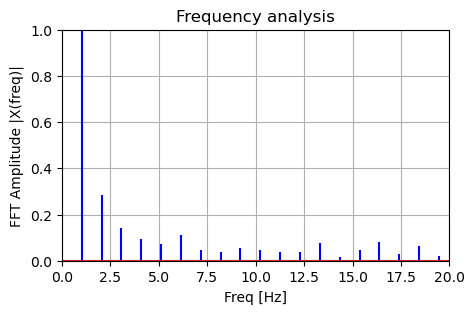

In [8]:
# fourier frequency analysis
freq_FS, X_FS = utils.fourier_analysis(sin_FS, fsmp = 1024)
#---------------------------------------------------------
plt.figure(figsize=(5, 3))
plt.stem(freq_FS, np.abs(X_FS), markerfmt='', linefmt='b' )
plt.xlabel('Freq [Hz]')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 20)
plt.ylim(0, 1)
plt.grid()
plt.title("Frequency analysis")


#### Sawtooth

In [9]:
def sawtooth_ampSmp(x):
    f0 = 3 # Hz
    return 0.8* signal.sawtooth(2 * np.pi * f0 * x, 0.7)

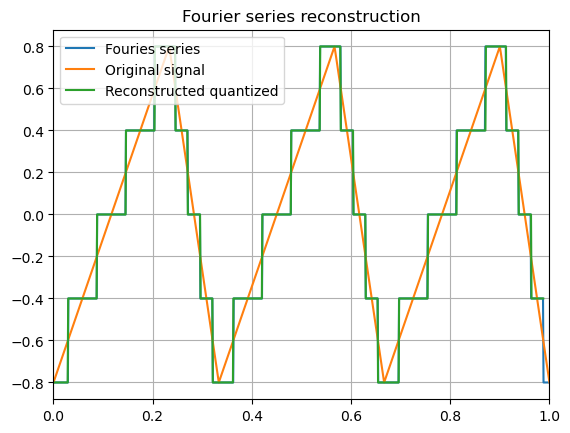

In [10]:
xlimit = 1
k = 200
sawtooth_FS, sawtooth_FS_off = amp_smp(sawtooth_ampSmp, T, q, xlimit, k, plot=True)

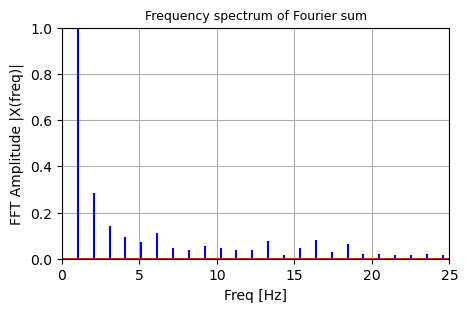

In [11]:
plt.figure(figsize=(5, 3))
utils.fourier_plot(freq_FS, X_FS, freq_lim=25, title="Frequency spectrum of Fourier sum")
plt.show()

# Polynomial

In [12]:
def poly_3(x):
    x = x-2
    return (x+3)*(x-2)**2*(x+1)**3

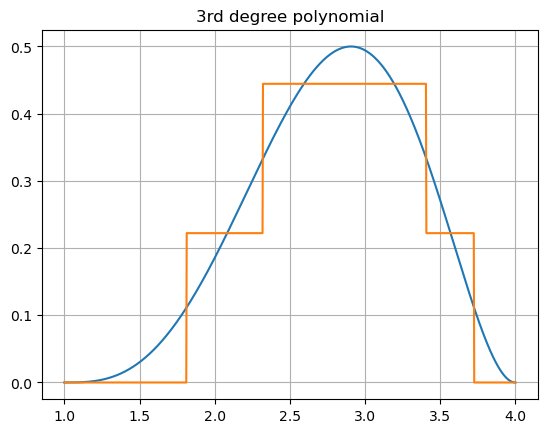

In [13]:
x =np.linspace(1,4, 1000)
q = functions.quantizer(9)
y = poly_3(x)/poly_3(x).max()/2
plt.plot(x, y)
plt.plot(x,q.quantize(poly_3(x)/poly_3(x).max()/2))
plt.title("3rd degree polynomial")
plt.grid()

#### Compound wave

In [14]:
def compound_ampSmp(x):
    f1 = 1
    f2 = 10
    return  0.3 * np.sin(2 * np.pi * f1 * x) + 0.6 * np.sin(2 * np.pi * f2 * x)

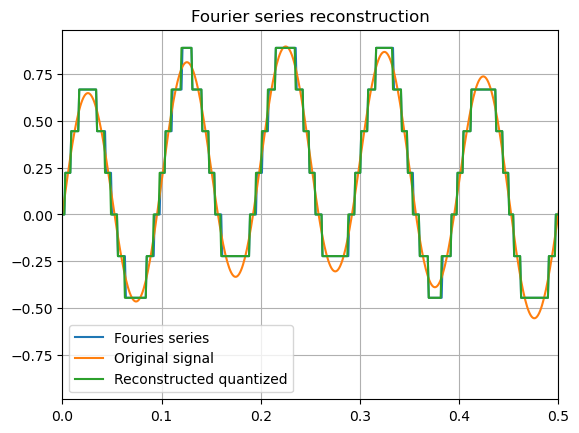

In [15]:
xlimit = 0.5
T=1
k = 200
compound_FS, compound_FS_off = amp_smp(compound_ampSmp, T, q, xlimit,k, plot = True)


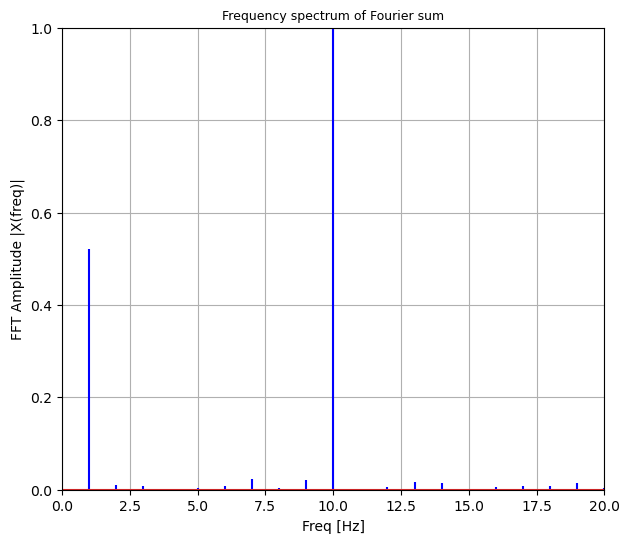

In [16]:
# fourier frequency analysis
freq_FS, X_FS = utils.fourier_analysis(compound_FS, fsmp = 1000)
#---------------------------------------------------------
plt.figure(figsize=(7, 6))
utils.fourier_plot(freq_FS, X_FS, freq_lim=20, title="Frequency spectrum of Fourier sum")
plt.show()

In [20]:
def test(t):
    return 0 if t<0.5 else 0.9

In [27]:
from functions import amp_smp

In [32]:
q = functions.quantizer(3)

In [33]:
amplitude_sampler(test,1, q)

(array([0. , 0.5]), array([1, 2]))